# Welcom to HiPIMS!


This document gives you a guidance and embeds the code to run the hipims code for case study.
You can run this tutorial in a couple of ways:

**In the cloud:** This is an easy way to get started! Use link to opens an integrated notebook in Google Colab.

**Locally:** This option requires you to setup HiPIMS first on your local machine. Download the notebook or copy the code into your favorite IDE. We recommand you using CUDA 12.4 and python>=3.10.

## About
HiPIMS names for High-Performance Integrated hydrodynamic Modelling System. It uses state-of-art numerical schemes (Godunov-type finite volume) to solve the 2D shallow water equations for flood simulations. To support high-resolution flood simulations, HiPIMS is implemented on multiple GPUs (Graphics Processing Unit) using CUDA/C++ languages to achieve high-performance computing.

**Package Author:** Xue Tong, Jiaheng Zhao

**Guidance and leadership:** Prof. Qiuhua Liang

**Affiliation:** Loughborough University


## 1. Install and import the package

### 1.1 Recommended applications:
- [**Visual Studio Code**](https://code.visualstudio.com/download) as Python IDE
    - Extensions: Python, jupyter, Remote - SSH


### 1.2 Check requirements
- NVIDIA driver requirements: > 550.x
    - Win: Right-click on an empty area of the desktop → Select “NVIDIA Control Panel” → Click on “System Information” in the bottom-left corner.
    - Linux: ```nvidia-smi ```
    - If too old, update via GeForce Experience Or [Official website](https://www.nvidia.com/en-us/drivers/).
- Python requirements: >= 3.10
    - ```python --version ```

### 1.3 Install HiPIMS and nessary packages in Terminal:

In [1]:
pip install hipims

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1


if ```pip install hipims``` not work, try ```python -m pip install hipims``` instead.

### 1.4 Test HiPIMS

In [2]:
from hipims.InputHipims import InputHipims
from hipims import flood
from hipims import visualization as visual

         Welcome to the HiPIMS! 

██╗  ██╗███████╗███╗   ███╗██╗      █████╗ ██████╗ 
██║  ██║██╔════╝████╗ ████║██║     ██╔══██╗██╔══██╗
███████║█████╗  ██╔████╔██║██║     ███████║██████╔╝
██╔══██║██╔══╝  ██║╚██╔╝██║██║     ██╔══██║██╔══██╗
██║  ██║███████╗██║ ╚═╝ ██║███████╗██║  ██║██████╔╝
╚═╝  ╚═╝╚══════╝╚═╝     ╚═╝╚══════╝╚═╝  ╚═╝╚═════╝ 
    ██╗  ██╗██╗██████╗ ██╗███╗   ███╗███████╗      
    ██║  ██║██║██╔══██╗██║████╗ ████║██╔════╝      
    ███████║██║██████╔╝██║██╔████╔██║███████╗      
    ██╔══██║██║██╔═══╝ ██║██║╚██╔╝██║╚════██║      
    ██║  ██║██║██║     ██║██║ ╚═╝ ██║███████║      
    ╚═╝  ╚═╝╚═╝╚═╝     ╚═╝╚═╝     ╚═╝╚══════╝      


## 2. Data Formats and Types
To run the flood model, you need to prepare specific data types. Below are the minimum required data and additional **data types** that can enhance your simulations.

1. **Spatial Distribution Data (SDD)**:  
   These data describe spatial patterns and variations across different locations. The supported formats include:  
   - **Single Value**: Represents a uniform value across the entire spatial domain, used when the phenomenon is consistent across all locations.
   - **`np.array` (NumPy Array)**: Allows users to input customised values as an array to represent spatial data.  
     *Note: The shape of the `np.array` must match the shape of the DEM to maintain spatial consistency.*
   - **`tif` (GeoTIFF) File**: A raster data format that includes geographic coordinate information, allowing for detailed spatial modelling.  
     *Note: The grid size of the GeoTIFF file must match that of the DEM.*

2. **Time Series Data (TSD)**:  
   These data represent temporal dynamics and support the following formats:  
   - **Single Value**: Represents a uniform value across the entire time period, implying no variation over time.
   - **`np.array` (NumPy Array)**: Allows users to input customised time series data. The first column represents the time series (unit: seconds), and the subsequent columns contain the corresponding values.
   - **File**: Time series data can be stored in a file, such as a `.txt` or `Excel file`.  
     *Note: If the data are on a specific sheet in an Excel file, use the format `['filename', 'sheetname']`. Otherwise, use `'filename'`.*

## 3. Running HiPIMS for Catchment Case Study
3.1 & 3.9 are necessary.

3.2-3.8 are optional, call only differ from default.

*Note: SDD refers to Spatial Distribution Data; TSD refers to Time Series Data.*


### 3.1 Quickstart

To define the model case, use the following:

- **Data Requirements**:
  - `DEM.tif` : Digital Elevation Model (DEM), providing terrain elevation data necessary for calculating water flow paths.

- **Function**: `InputHipims`

  **Keyword Arguments**:

<div align="center">

| Argument           | Type    | Description                                                               |
|--------------------|---------|---------------------------------------------------------------------------|
| `input_folder`      | String  | Path to the folder containing the case input files.                              |
| `output_folder`    | String  | Path to the folder where the simulation output files will be saved.        |
| `dem`         | String  | Path to the Digital Elevation Model (DEM) file, providing terrain data.    |

</div>


In [3]:
pip show hipims

Name: hipims
Version: 2.1.0
Summary: HiPIMS names for High-Performance Integrated hydrodynamic Modelling System. It uses state-of-art numerical schemes (Godunov-type finite volume) to solve the 2D shallow water equations for flood simulations. To support high-resolution flood simulations, HiPIMS is implemented on multiple GPUs (Graphics Processing Unit) using CUDA/C++ languages to achieve high-performance computing.
Home-page: https://example.com
Author: 
Author-email: Jiaheng Zhao <jiaheng.zhao@fmglobal.com>, Xue Tong <x.tong2@lboro.ac.uk>
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: geopandas, matplotlib, openpyxl, rasterio, seaborn, spicy
Required-by: 


In [4]:
# Minimal requirements
# Define simulation domain
input_folder = r"/usr/local/lib/python3.11/dist-packages/hipims/sample/input"
output_folder = r"/usr/local/lib/python3.11/dist-packages/output"
dem = r"DEM.tif"

# for Linux
# input_folder = 'C:\HiPIMS_2024\src\hipims\sample\input'
# output_folder = 'C:\HiPIMS_2024\src\hipims\sample\output'
# dem = 'DEM.tif'

inputs = InputHipims(input_folder = input_folder,
                     output_folder= output_folder,
                     dem = dem)

Want to see your simulation area? Run:

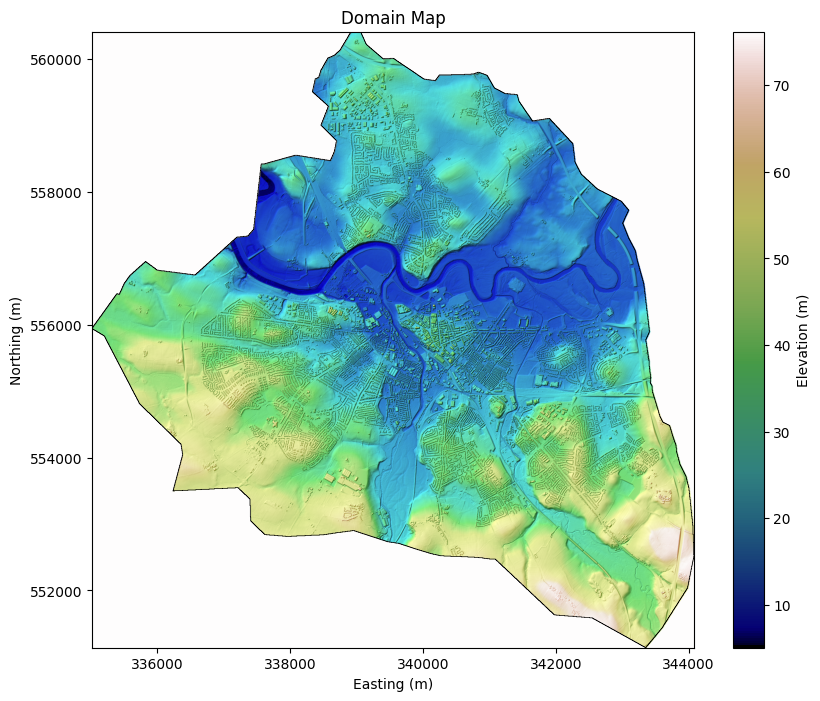

In [5]:
import os
dem_path = os.path.join(input_folder, dem)
outline_path = os.path.join(input_folder, 'outline.shp')
visual.domain(file_path = dem_path, outline=outline_path)

### 3.2 Set Rainfall
Define the rainfall data for the simulation. By default, there is no rainfall.

- **Function**: `set_rainfall`

  **Keyword Arguments:**

<div align="center">

| Argument      | Type                             | Unit                     | Default | Description                                                                                           |
|---------------|----------------------------------|--------------------------|---------|-------------------------------------------------------------------------------------------------------|
| `rain_mask`   | SDD   | N/A     | `0`     | A mask that defines the rainfall station indices. indices.                                                     |
| `rain_source` | TSD   | mm/hr   | `0`     | The source of rainfall data. The first column represents time, and the subsequent columns correspond to the indices in `rain_mask`, starting from 0. |

</div>


In [6]:
inputs.set_rainfall(rain_mask='rainMask.tif',rain_source='rainfall_source.txt')

Want to see the rainfall mask and time series? Run:

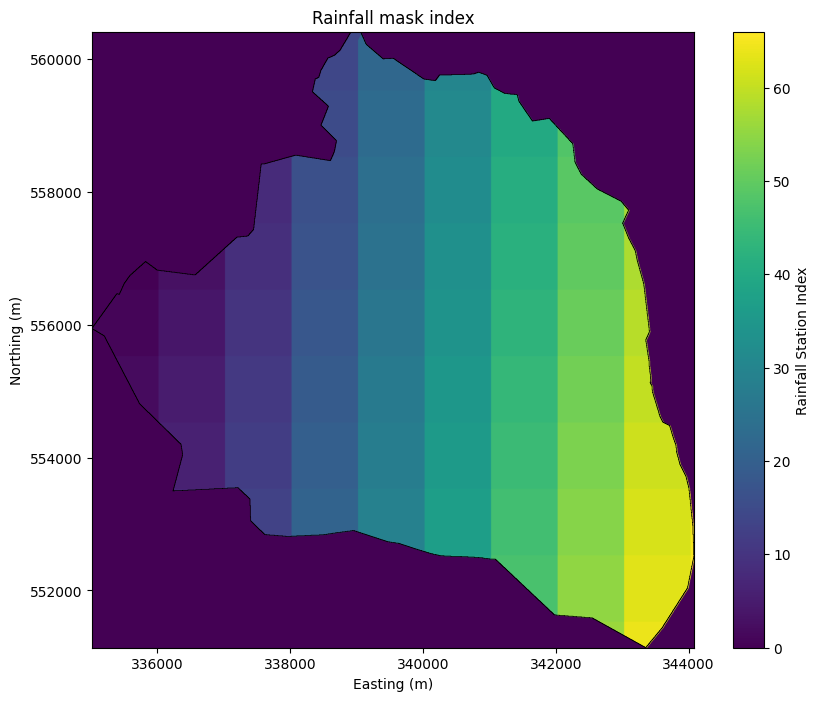

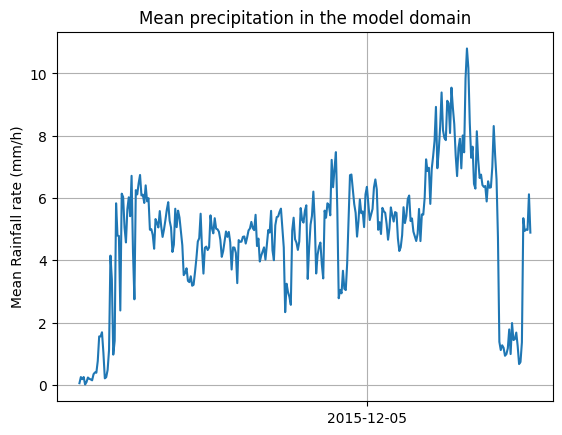

In [7]:
# show the rainfall mask
rain_path = os.path.join(input_folder, 'rainMask.tif')
visual.rain_mask(file_path = rain_path,
                 outline = outline_path)

# show the raifnall time series
from datetime import datetime
rain_source_path = os.path.join(input_folder, 'rainfall_source.txt')
start_date = datetime(2015,12,4,17,0,0)
visual.rainfall_time_series(file_path = rain_source_path,
                            start_date = start_date)

### 3.3 Set Up Model Parameters

Define the model parameters to control the simulation's configuration.

- **Function**: `set_model_parameters`

  **Keyword Arguments**:

<div align="center">

| Argument              | Type     | Default  | Description                                                            |
|-----------------------|----------|----------|------------------------------------------------------------------------|
| `num_GPU`             | Integer  | `1`      | Number of GPU devices to use.                                          |
| `start_time`          | Numeric  | `0`      | Simulation start time for the event in seconds.                        |
| `GPU_device_ID`       | Integer  | `0`      | ID of the GPU device.                                                  |
| `end_time`            | Numeric  | `3600`   | Total simulation time in seconds.                                      |
| `output_interval`     | Numeric  | `600`    | Specifies how frequently (in seconds) the output files are saved.      |
| `second_order`        | Boolean  | `False`  | Specifies whether to use a second-order solver.                        |
| `projected_coordinate`| Boolean  | `False`  | Indicates whether the geographic coordinate is in a projected coordinate system.                        |

</div>

For example, if the case starts from 01-Jan-2024 00:00:00 and ends at 01-Jan-2024 00:03:00 and you would like to see the results for every 10 minuts, then the star_time should be `0`, the output_intervel is `600` = 10 min * 60 s/min = 600 s, and the end_time is `10800` = 3 hour * 3600 s/hour = 10800 s.

In [8]:
inputs.set_model_parameters(output_interval=600, end_time=600)

### 3.4 Set Initial Condition

Define the initial conditions for the simulation. By default, the simulation area is considered completely dry.
- **Function**: `set_initial_condition`

  **Keyword Arguments:**

<div align="center">

| Argument     | Type  | Unit       | Default | Description                                |
|--------------|-------|------------|---------|--------------------------------------------|
| `h0`         | SPD   | Metres (m) | `0`     | Initial water depth.                       |
| `hU0x`       | SPD   | Metres (m) | `0`     | Initial unit discharge in the x-direction. |
| `hU0`        | SPD   | Metres (m) | `0`     | Initial unit discharge in the y-direction. |

</div>



In [9]:
inputs.set_initial_condition(h0='depth.tif',
                              hU0x='hux.tif',
                              hU0y='huy.tif')

Want to see initial condition? Run:

### 3.5. Set Boundary Condition

Define the Input/Output (IO) boundaries at the edges of the model domain. These boundaries typically represent river inflow from upstream or river water depth/tidal levels downstream.

- **Function**: `set_boundary_condition`

  **Keyword Arguments:**

| Argument           | Type                   | Description                                                                                                    |
|--------------------|------------------------|----------------------------------------------------------------------------------------------------------------|
| `bound_list`       | List of dictionaries   | A list where each dictionary represents a boundary condition for the model.                                    |
| - `extent`         | Array                  | Specifies the boundary's spatial extent using minimum and maximum X and Y coordinates in the format `[x_min, x_max, y_min, y_max]`. |
| - `type`           | String                 | Defines the type of boundary condition (see **Boundary Condition Types** below for details).                   |
| - `source`         | TSD / None             | Specifies the source of data for the boundary condition. (see **Boundary Condition Types** below for details). |
| `outline_boundary` | String                 | Specifies the condition applied to the model's outer boundary.                                                 |

- **Boundary Condition Types**

  The following types of boundary conditions are available:

<div align="center">

| Boundary Type   | Description                                                                 | Source | Unit                        |
|-----------------|-----------------------------------------------------------------------------|--------------------------------------|------------------------------|
| `RIGID`         | A solid, non-movable boundary.                                               | None | N/A                          |
| `WALL_SLIP`     | Allows slip conditions along a wall boundary.                                | None | N/A                          |
| `OPEN`          | An open boundary where flow can freely enter or exit.                        | None  | N/A                          |
| `H_GIVEN`       | A boundary with a specified water depth.                                     | TSD          | m                |
| `Q_GIVEN`       | A boundary with a specified flow discharge.                                  | TSD| m³/s|
| `WL_GIVEN`      | A boundary with a specified water level.                                     | TSD| m               |
| `FALL`          | A specific condition, such as a falling water level.                         | None           | N/A |

</div>

In [11]:
boundary1 = {'extent': [339490.05, 339516.74, 552724.15, 552731.72], #[left, right, bottom, top]
             'type': 'WL_GIVEN',
             'source': 23.8}
boundary2 = {'extent': [343488.09, 343505.57, 551295.62, 551320.47],
             'type': 'Q_GIVEN',
             'source': ['Q_source.xlsx', 'Petteril']}
boundary3 = {'extent': [342871.50, 342931.40, 557885.14, 557918.513],
             'type': 'Q_GIVEN',
             'source': ['Q_source.xlsx', 'Eden']}
boundary4 = {'extent':  [337093.251, 337163.418, 557213.469, 557293.638],
             'type': 'OPEN',
             'source': None}

bound_list = [boundary1, boundary2, boundary3, boundary4 ]

inputs.set_boundary_condition(bound_list = bound_list,
                              outline_boundary = 'FALL')

Show your boundary? Run:

In [ ]:
visual.domain(file_path = dem_path, bound_list= bound_list, outline=outline_path)

### 3.6 Land Cover and Related Processes
Land cover types, such as forests, urban areas, or fields, affect the speed and volume of surface water flow by influencing processes like surface friction, infiltration, and sewer drainage.

#### 3.6.1 Defining Land Cover
Define the land cover data for the simulation to represent different types of land use within the case domain.

- **Function**: `set_landuse`

    **Keyword Argument:**

<div align="center">

| Argument        | Type                             | Default | Description                                                |
|-----------------|----------------------------------|---------|------------------------------------------------------------|
| `landuse_mask`  | SPD (Spatial Distribution Data)  | `0`     | Indexes the land use distribution within the case domain.   |

</div>

In [12]:
inputs.set_landuse(landuse_mask='Landcover.tif')

To show the Landuse data, run:

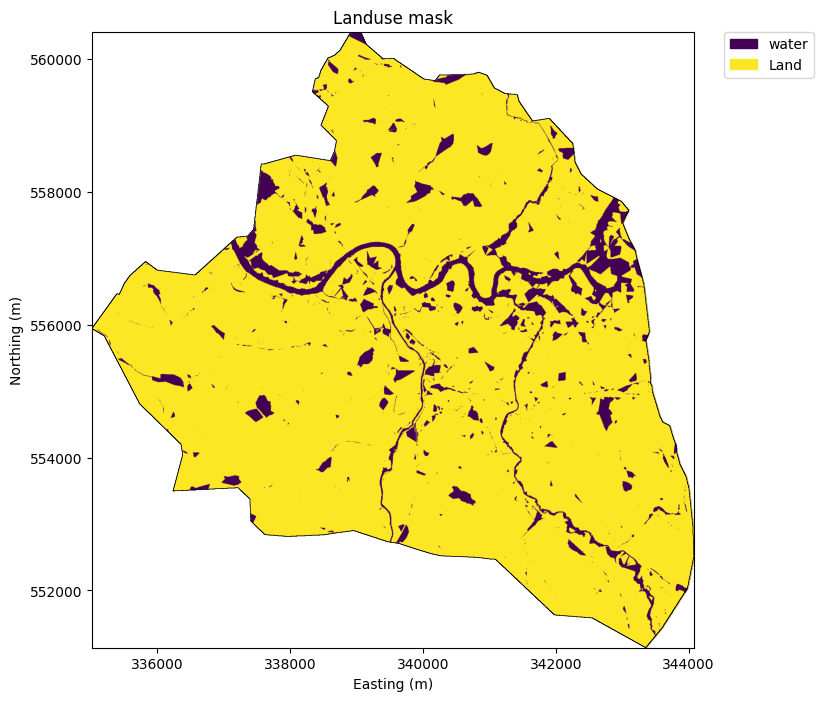

In [13]:
land_path = os.path.join(input_folder, 'Landcover.tif')
visual.land_mask(file_path = land_path,
                 categories={1:'water', 2:'Land'},
                 title = 'Landuse mask',
                 outline = outline_path)

#### 3.6.2 Common Data Formats for Land Cover-Based Parameters
All land cover-based parameters share the following data formats:
- **Single Value**:  A numeric value applied for all land use categories.
- **`np.array` (NumPy Array)**: An array of numeric values corresponding to the land use categories defined in the `landuse_mask`. The values should be ordered from the smallest to the largest land use indices.
- **List**:  A list format that allows for custom settings:
   - **`'default_value'`**: The default parameter value for all land use categories except specified types.
   - **`'special_land_type_value'`**: The index of a specific land use category requiring a different parameter value.
   - **`'special_param_value'`**: The value corresponding to the `special_land_type_value` for the specified parameter.

#### 3.6.3 Friction
Friction in hydrodynamic modelling refers to the resistance water encounters as it flows over different surfaces, such as riverbeds, floodplains, or urban landscapes. This resistance is primarily influenced by the roughness of the surface, which slows down the water and dissipates its energy.

- **Function**: `set_manning`

    **Keyword Argument:**

<div align="center">

| Argument        | Type                             | Default | Description                                                |
|-----------------|----------------------------------|---------|------------------------------------------------------------|
| `manning`  | Land Cover-Based Parameters  | `0`     | The roughness coefficient. Higher values represent rougher surfaces, slowing down water flow.  |

</div>


In [14]:
inputs.set_manning(manning={'default_value': 0.035,
                            'special_land_type_value': [1],
                            'special_param_value': [0.03]})

#### 3.6.4 Infiltration

Infiltration is the process by which water on the ground surface enters the soil. In HiPIMS, the [**Green-Ampt model**](https://en.wikipedia.org/wiki/Green%E2%80%93Ampt_model) is used to calculate the amount of water that infiltrates into the soil over time.

There are two methods for setting up infiltration.

***!!! Run one of the following methods depending on your own case:***



##### Method 1: Manual Parameter Setting
Directly assign specific values for each parameter based on different land cover types.

- **Function**: `set_infiltration`

**Keyword Arguments:**

<div align="center">

| Argument                 | Type                         | Default | Description                                                                 |
|--------------------------|------------------------------|---------|-----------------------------------------------------------------------------|
| `cumulative_depth`       | Land Cover-Based Parameters  | `0`     | Cumulative infiltration depth since the start of the simulation (m).         |
| `hydraulic_conductivity` | Land Cover-Based Parameters  | `0`     | The rate at which water moves through the soil, depending on soil properties (m/s). |
| `capillary_head`         | Land Cover-Based Parameters  | `0`     | Soil suction at the wetting front, affecting water infiltration (m).         |
| `water_content_diff`     | Land Cover-Based Parameters  | `0`     | Difference in water content between saturated and initial conditions (m³/m³). |

</div>

In [15]:
inputs.set_infiltration(cumulative_depth=0,
                        hydraulic_conductivity=0,
                        capillary_head=0,
                        water_content_diff=0)


##### Method 2: Automatic Parameter Setting by Soil Type
Automatically determine parameter values based on the soil type associated with each land cover type.

Soil types are based on the USDA Soil Classification: Clay, Silty Clay, Sandy Clay, Clay Loam, Silty Clay Loam, Sandy Clay Loam, Silt Loam, Loam, Sandy Loam, Loamy Sand, Sand, Impervious Surface, Water.

- **Function**: `set_soil_type`

    **Keyword Arguments:**

<div align="center">

| Argument | Format | Description |
|----------|--------|-------------|
| `soil_type`   | List | Specifies the soil type settings for different land use categories.     |
| - `default_soil_type` | String | Default soil type for all land use categories unless specified otherwise. |
| - `special_land_type_value` | list of values / None | Index of a specific land use category requiring a different soil type.|
| - `special_soil_type` | list of string / None | The soil type corresponding to the `special_land_type_value`.|
</div>



In [ ]:
inputs.set_soil_type(soil_type={'default_soil_type': 'Impervious Surface',
                                'special_land_type_value': [1],
                                'special_soil_type': ['Water']})

#### 3.6.5 Sewer System
By defining areas in the model that drain water into the sewer system, users can simulate how water is removed from specific land cover types, such as roads, at a controlled rate.

- **Function**: `set_sewer_sink`

    **Keyword Arguments:**

<div align="center">

| Argument     | Type                        | Default | Description                                                               |
|--------------|-----------------------------|---------|---------------------------------------------------------------------------|
| `sewer_sink` | Land Cover-Based Parameters | `0`     | Specifies the rate at which water is drained into the sewer system maximumly (m/s). |

</div>


In [ ]:
inputs.set_sewer_sink(sewer_rate=0)

### 3.7 Set river gauges
Set gauges with the river channel to monitor timeseries of water level and velocity

In [ ]:
import numpy as np
gauge_coords = np.array([[340194, 556641]])
inputs.set_gauges_position(gauge_coords)

### 3.8 Check your data before running

In [ ]:
print(inputs)

### 3.9 Run flood model

The simulation speed may vary depends on the GPU type, grid cell numbers, and the complexity of the simulation case. In this demonstration, it may take you around 20 minutes on Google Colab.

In [16]:
flood.run(inputs)

Initializing data ...
1.117
1.851
2.318
2.750
3.181
3.595
3.991
4.379
4.760
5.135
5.506
5.866
6.220
6.573
6.925
7.276
7.628
7.979
8.331
8.683
9.035
9.387
9.739
10.091
10.443
10.796
11.148
11.501
11.853
12.206
12.559
12.913
13.266
13.620
13.973
14.327
14.681
15.035
15.389
15.744
16.099
16.453
16.809
17.164
17.520
17.876
18.232
18.589
18.947
19.304
19.662
20.021
20.380
20.739
21.099
21.460
21.821
22.182
22.544
22.906
23.268
23.631
23.995
24.358
24.722
25.087
25.452
25.817
26.182
26.547
26.913
27.279
27.645
28.011
28.377
28.744
29.110
29.477
29.844
30.211
30.578
30.945
31.313
31.680
32.048
32.415
32.783
33.151
33.518
33.886
34.254
34.622
34.990
35.358
35.726
36.094
36.462
36.830
37.198
37.566
37.934
38.302
38.670
39.039
39.407
39.775
40.144
40.512
40.880
41.249
41.617
41.986
42.354
42.723
43.092
43.460
43.829
44.198
44.567
44.935
45.304
45.673
46.042
46.411
46.780
47.150
47.519
47.888
48.257
48.627
48.996
49.366
49.735
50.105
50.474
50.844
51.214
51.584
51.954
52.324
52.694
53.064
53.434


## 4. Visualize outputs

Show the maximum water depth within the simulated period. Run:

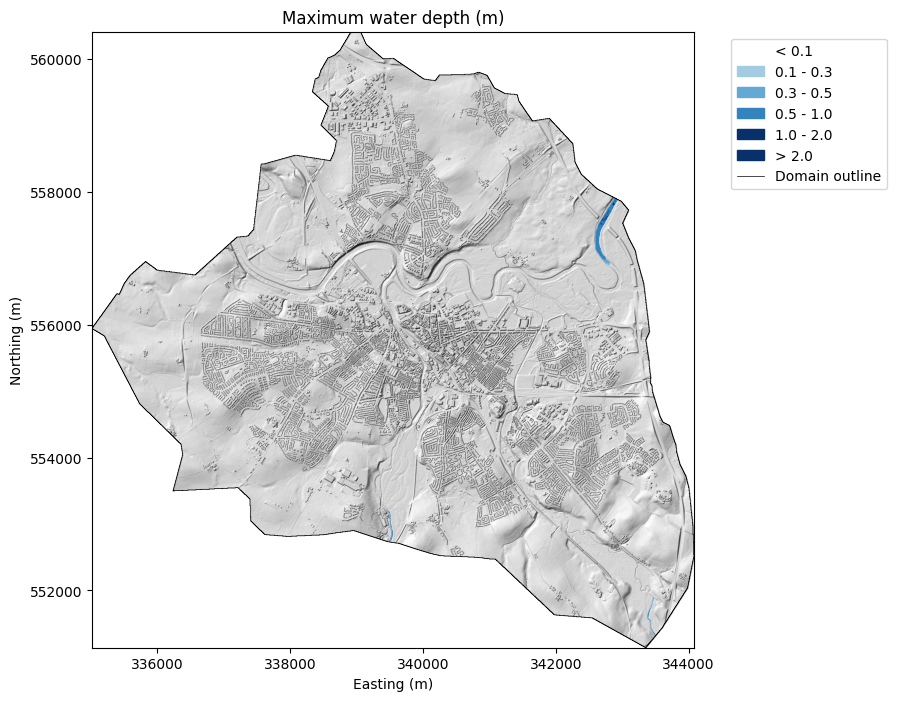

In [17]:
max_depth_path = os.path.join(output_folder, "h_max_600.tif")

visual.inundation_depth(file_path = max_depth_path,
                        title = 'Maximum water depth (m)',
                        basemap=dem_path,
                        outline=outline_path)

## 5. Use outputs for flood risk assessment

There are lots of method to assess flood risk using HiPIMS outputs. Here we provide an easy demonstration, but you can use your own methods.

Step 1: Choose the key infrastructure. Here schools​ are selected as the critical infrastructure of interest.

Step 2: Use QGIS/ArcGIS tool (such as Zonal Statistics) to figure out maximum inundation depth (denoted as H) within school (or buffer) areas​.

​Step 3: Calculate economic loss of each school area in terms of the economic loss curve. For example F=11616.4*lgH+4030.7* (lgH)2+969.4 *(lgH)3 +30139.1​

​Step 4: Calculate the total expected economic loss of schools​.